In [1]:
import pandas as pd
df = pd.read_csv("indiancrop_dataset.csv")
df.head()

N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
0      90      42      43    20.879744  82.002744  6.502985  202.935536   
1      85      58      41    21.770462  80.319644  7.038096  226.655537   
2      60      55      44    23.004459  82.320763  7.840207  263.964248   
3      74      35      40    26.491096  80.158363  6.980401  242.864034   
4      78      42      42    20.130175  81.604873  7.628473  262.717340   

                 STATE  CROP_PRICE  CROP  
0  Andaman and Nicobar        7000  Rice  
1  Andaman and Nicobar        5000  Rice  
2  Andaman and Nicobar        7000  Rice  
3  Andaman and Nicobar        7000  Rice  
4  Andaman and Nicobar      120000  Rice

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [3]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [4]:
df.columns

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [5]:
df.shape

(2200, 10)

In [6]:
df.describe().T

count         mean          std        min         25%  \
N_SOIL       2200.0    50.551818    36.917334   0.000000   21.000000   
P_SOIL       2200.0    53.362727    32.985883   5.000000   28.000000   
K_SOIL       2200.0    48.149091    50.647931   5.000000   20.000000   
TEMPERATURE  2200.0    25.616244     5.063749   8.825675   22.769375   
HUMIDITY     2200.0    71.481779    22.263812  14.258040   60.261953   
ph           2200.0     6.469480     0.773938   3.504752    5.971693   
RAINFALL     2200.0   103.463655    54.958389  20.211267   64.551686   
CROP_PRICE   2200.0  2689.228182  3710.361267   2.000000  950.000000   

                     50%          75%            max  
N_SOIL         37.000000    84.250000     140.000000  
P_SOIL         51.000000    68.000000     145.000000  
K_SOIL         32.000000    49.000000     205.000000  
TEMPERATURE    25.598693    28.561654      43.675493  
HUMIDITY       80.473146    89.948771      99.981876  
ph              6.425045     6.923643       9.935091  
RAINFALL       94.867624   124.267508     298.560117  
CROP_PRICE   1825.000000  3500.000000  120000.000000

Outlier Handling

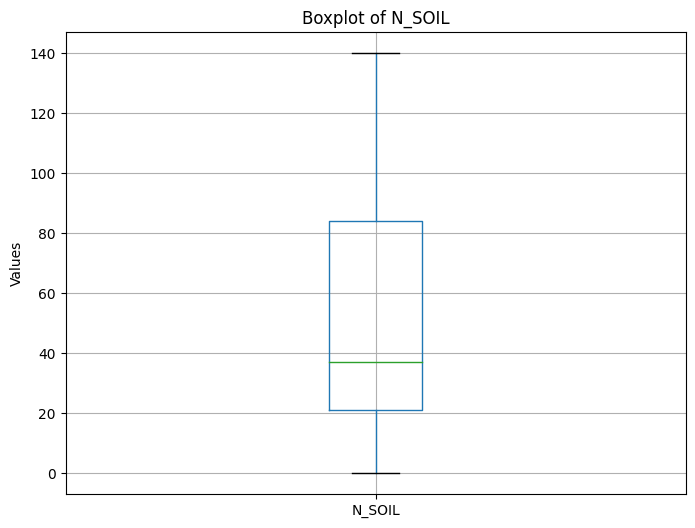

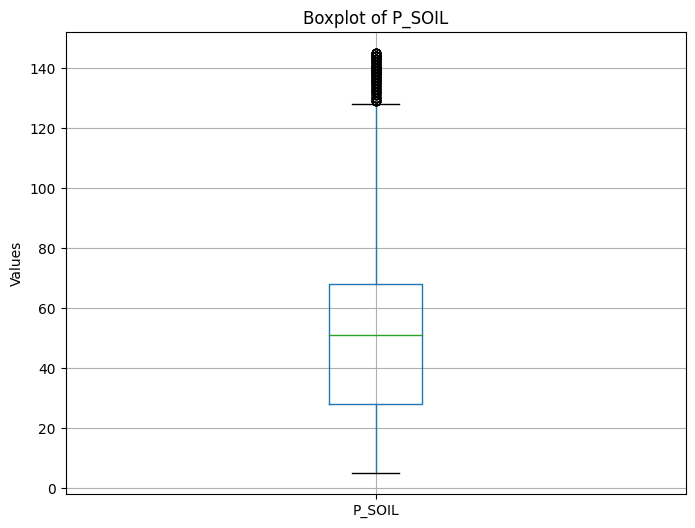

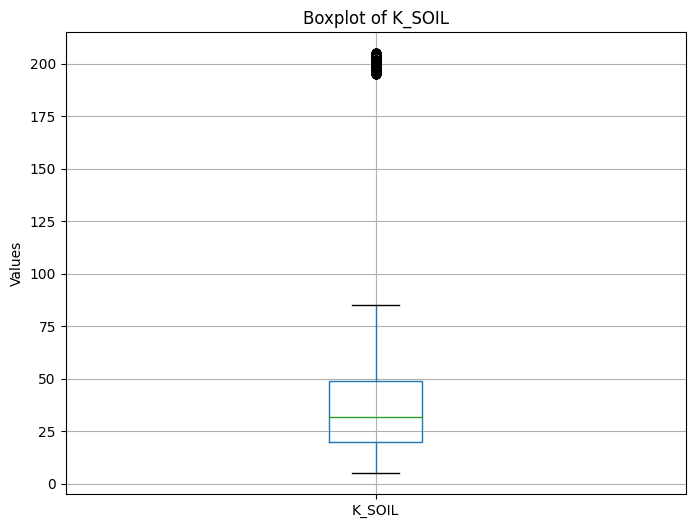

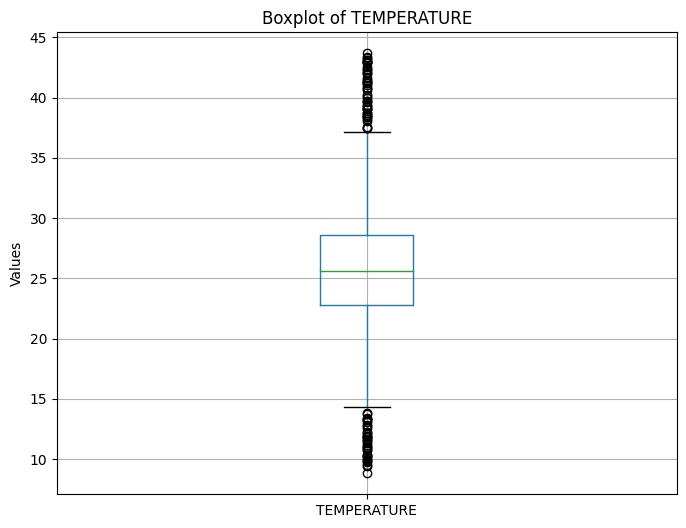

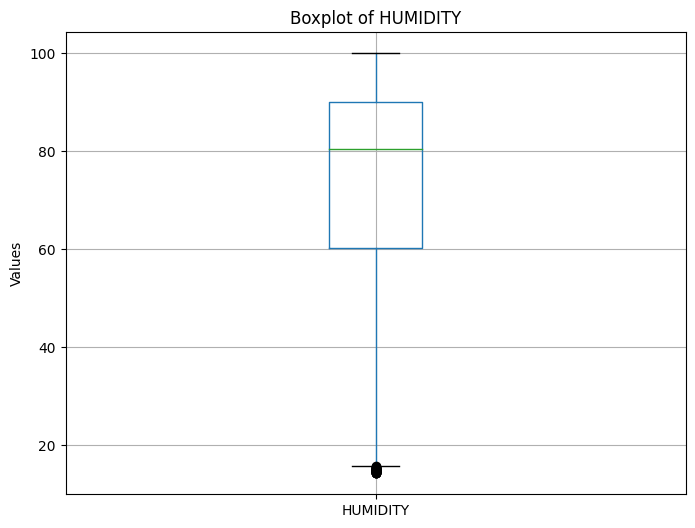

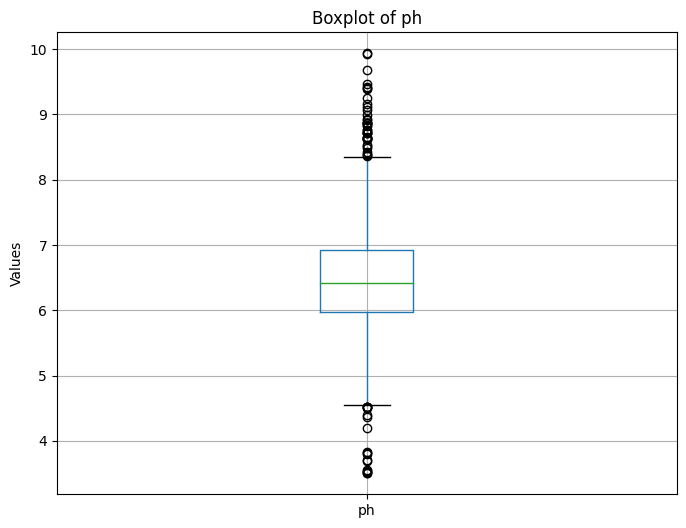

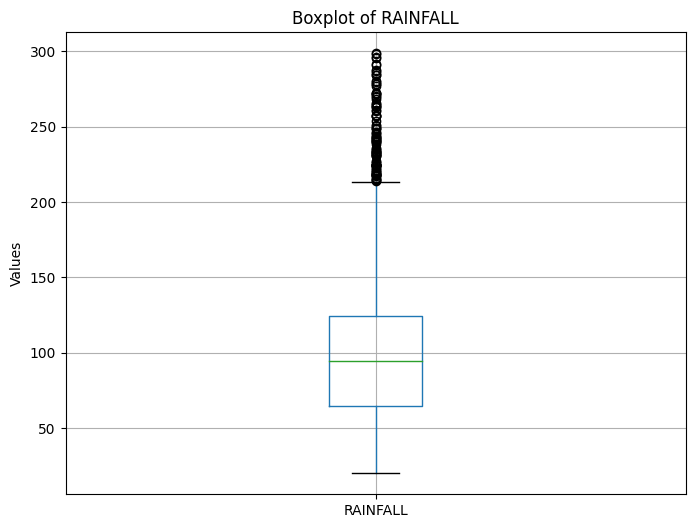

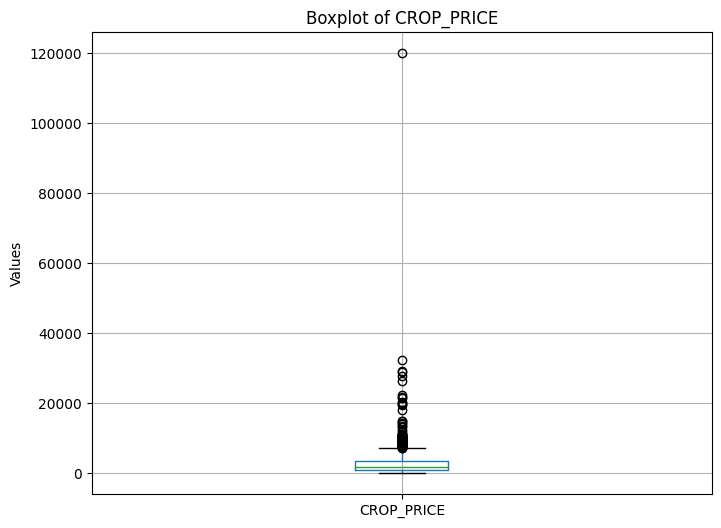

In [7]:
import matplotlib.pyplot as plt
numerical_cols = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']

# Plot box plots for each numerical column individually
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()


In [8]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' with integer columns
def check_outliers(df):
  int_cols = df.select_dtypes(include="int")
  outliers_info = pd.DataFrame(columns=["Column", "outlier vals","Outlier Count"])

  q1 = int_cols.quantile(0.25)
  q3 = int_cols.quantile(0.75)
  outlier_columns =[]

  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)
  print(lower_limit)

  for col in int_cols.columns:
      # Check for outliers in each column
      outlier_vals = ((df[col] < lower_limit[col]) | (df[col] > upper_limit[col]))
      outlier_count = ((df[col] < lower_limit[col]) | (df[col] > upper_limit[col])).sum()

      # If there are outliers, add the column and count to the DataFrame
      if outlier_count > 0:
          outlier_columns.append(col)
          outliers_info = outliers_info.append({"Column": col, "Outlier Count": outlier_count,"outlier vals": outlier_vals}, ignore_index=True)

  # Display DataFrame with columns containing outliers and their counts

  #print("columns with outliers = ",outlier_columns)
  return outlier_columns,outliers_info,lower_limit,upper_limit

In [9]:
import numpy as np

def winsorize_column(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df[col] = np.where(df[col] <= lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] >= upper_limit, upper_limit, df[col])

def handle_outliers(df, outlier_columns):
    for col in outlier_columns:
        winsorize_column(df, col)

# Assuming df is your DataFrame

# Call the function to handle outliers
outlier_columns = ['N_SOIL', 'P_SOIL','K_SOIL','TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']
handle_outliers(df, outlier_columns)

# Check for outliers after winsorization
outlier_columns, outliers_df, lower_limit, upper_limit = check_outliers(df)
print(outliers_df)
print(outlier_columns)


Series([], dtype: float64)
Empty DataFrame
Columns: [Column, outlier vals, Outlier Count]
Index: []
[]


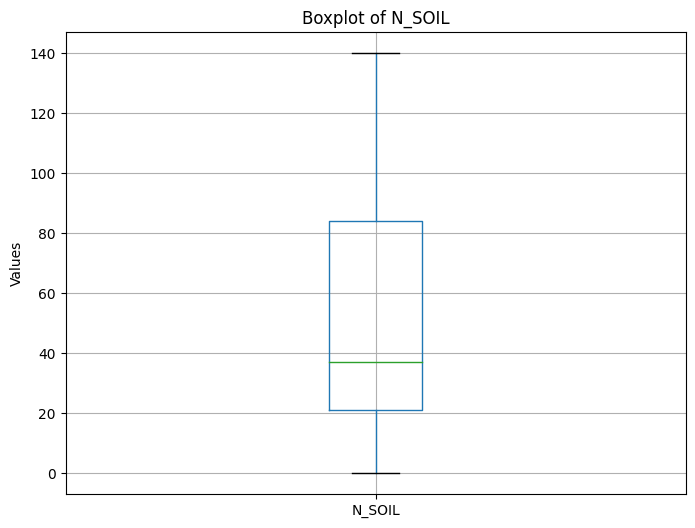

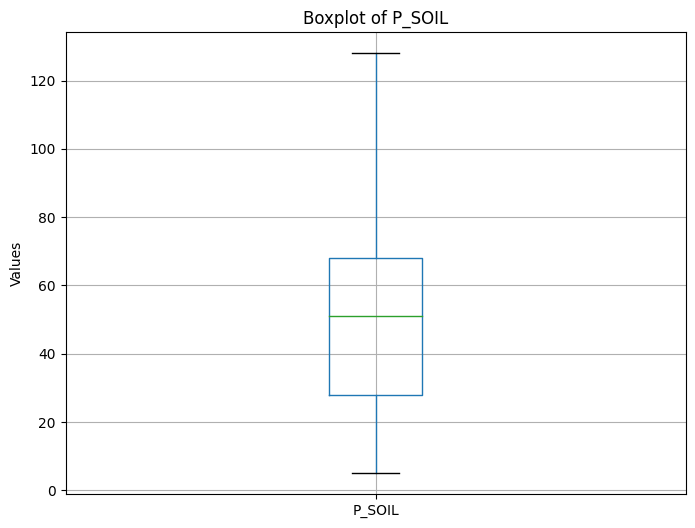

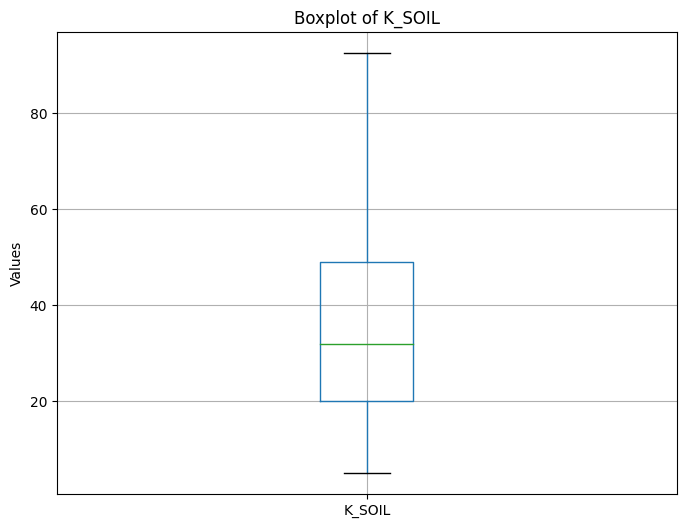

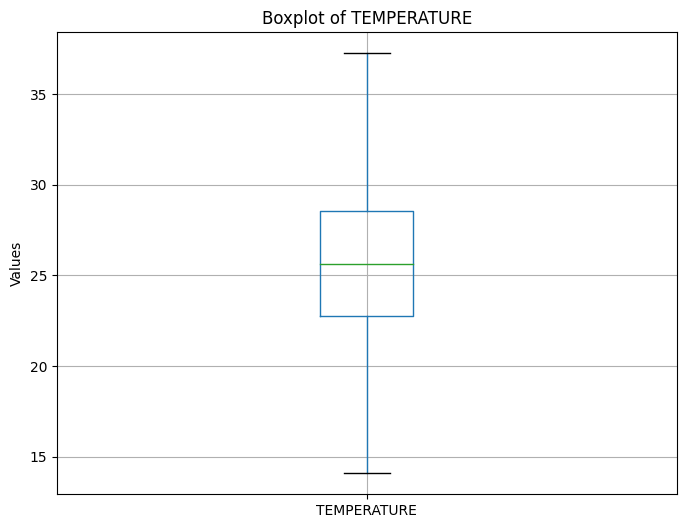

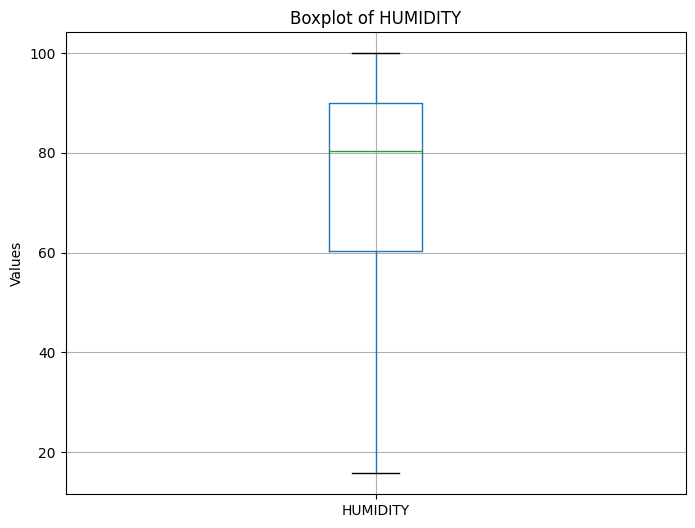

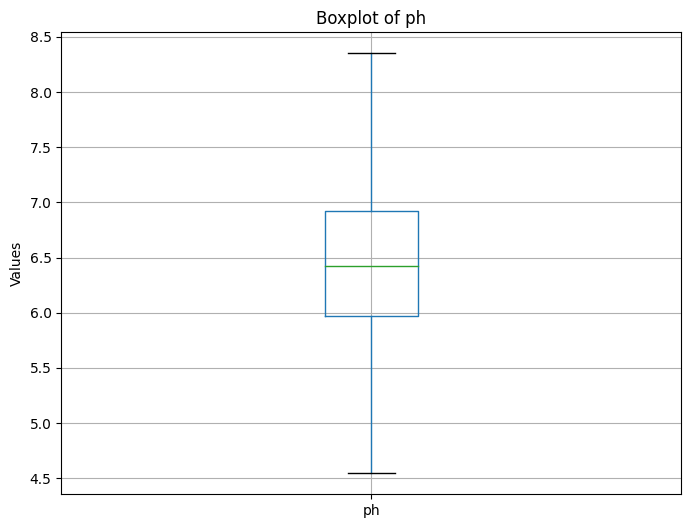

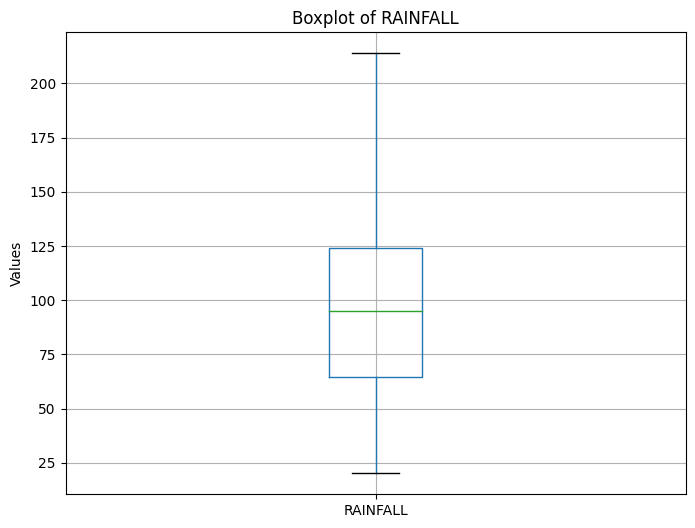

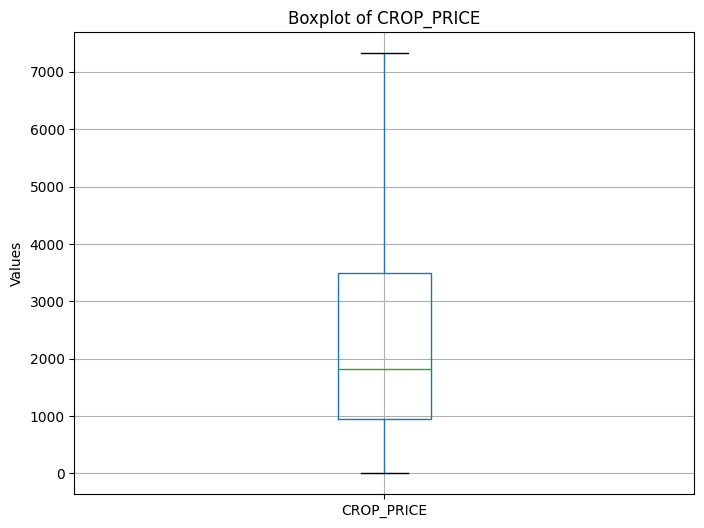

In [10]:
import matplotlib.pyplot as plt
numerical_cols = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']

# Plot box plots for each numerical column individually
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

EDA1: Agricultural Diversity Across States

<ipython-input-11-eb941b0aac61>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statewise_mean = df.groupby('STATE').mean()


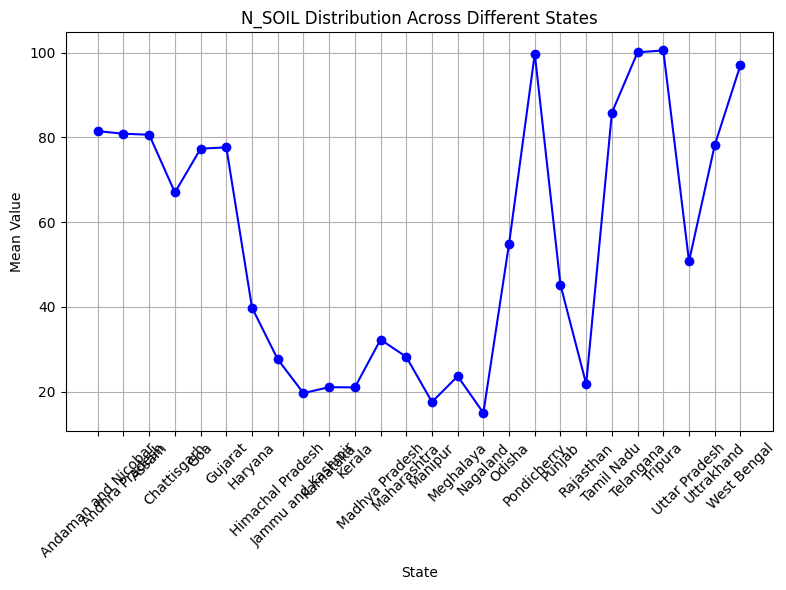

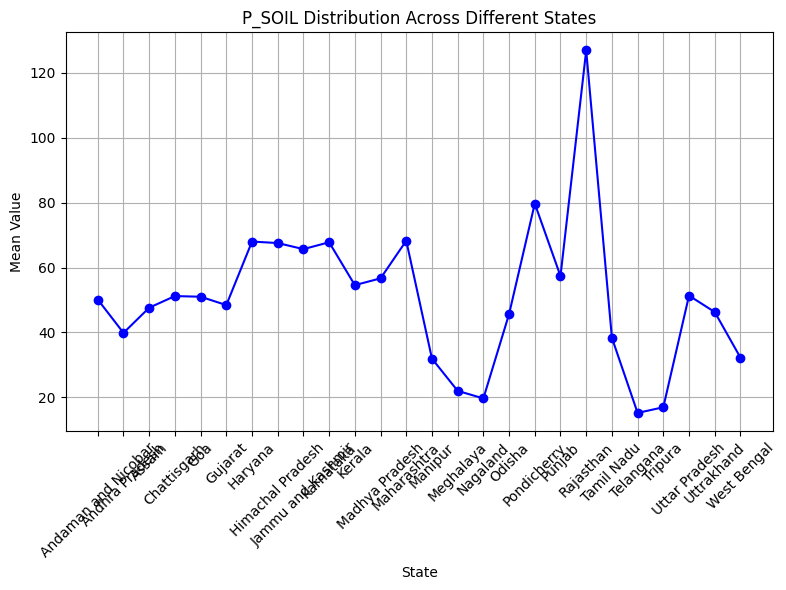

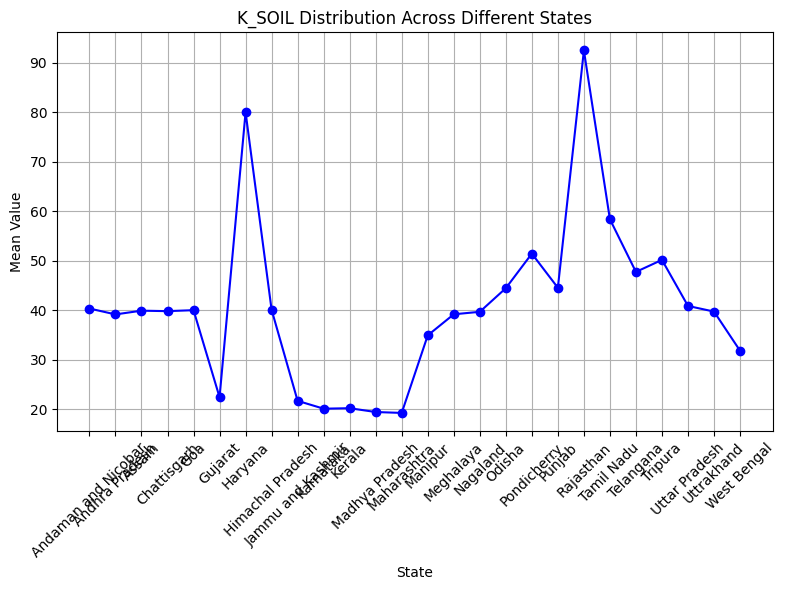

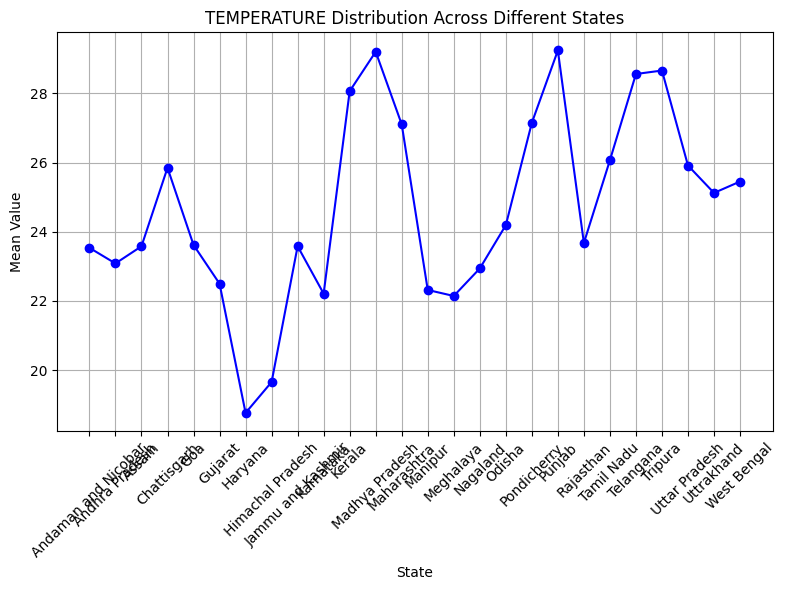

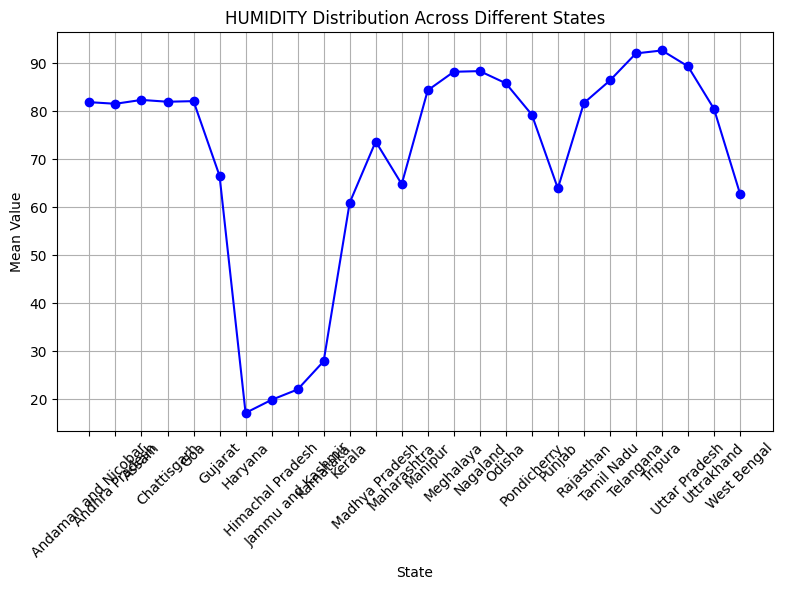

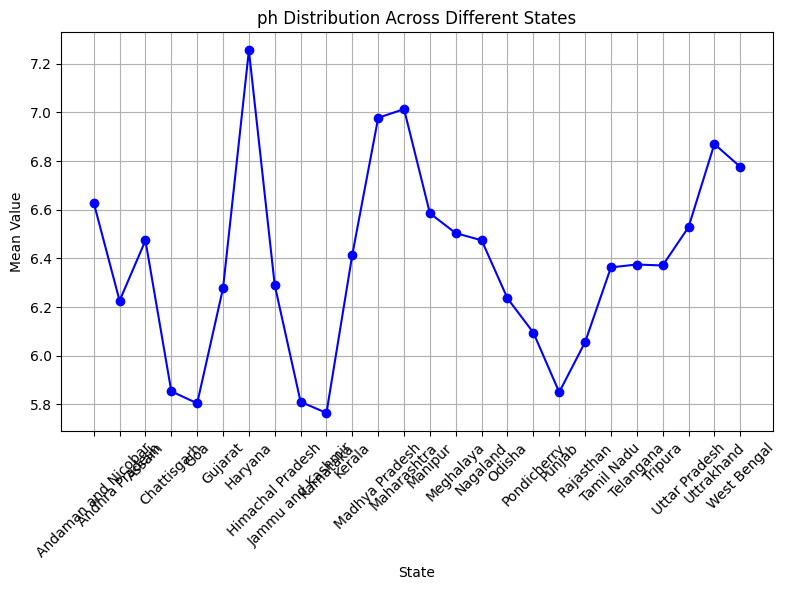

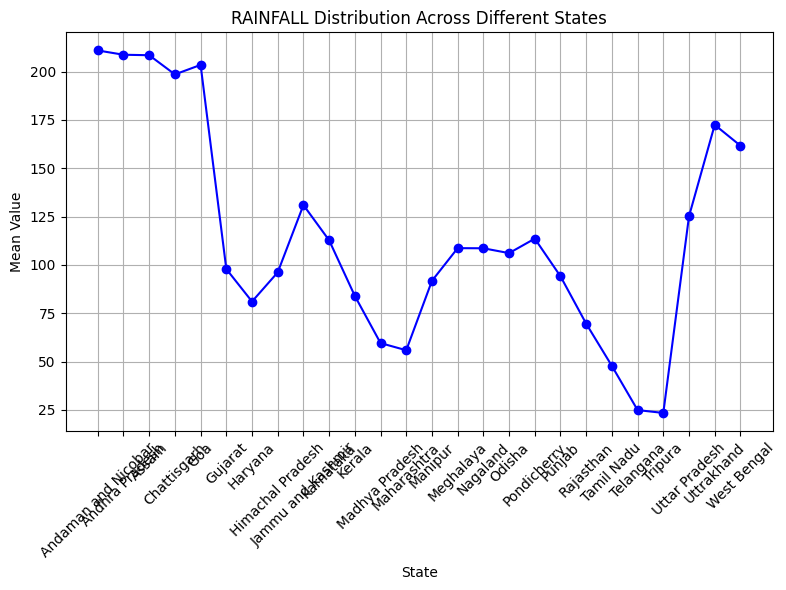

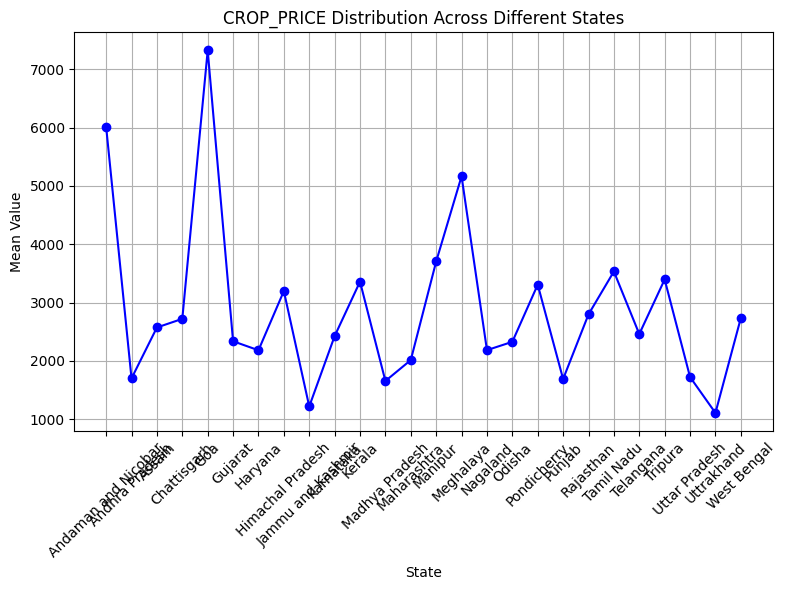

Statewise Mean Dataframe:
                         N_SOIL      P_SOIL     K_SOIL  TEMPERATURE  \
STATE                                                                 
Andaman and Nicobar   81.466667   50.133333  40.333333    23.536551   
Andhra Pradesh        80.857143   39.857143  39.142857    23.084331   
Assam                 80.620690   47.620690  39.896552    23.581132   
Chattisgarh           67.000000   51.200000  39.800000    25.849626   
Goa                   77.333333   51.000000  40.000000    23.619286   
Gujarat               77.646018   48.424779  22.398230    22.499366   
Haryana               39.830769   68.000000  80.015385    18.763236   
Himachal Pradesh      27.647059   67.539216  40.078431    19.656499   
Jammu and Kashmir     19.666667   65.666667  21.666667    23.582200   
Karnataka             21.083333   67.777778  20.083333    22.211717   
Kerala                21.010949   54.572993  20.182482    28.064220   
Madhya Pradesh        32.295455   56.659091  19.409

In [11]:
statewise_mean = df.groupby('STATE').mean()

# Plotting individual line plots for each feature
for feature in statewise_mean.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(statewise_mean.index, statewise_mean[feature], marker='o', color='blue')
    plt.title(f'{feature} Distribution Across Different States')
    plt.xlabel('State')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Displaying the corresponding dataframe
print("Statewise Mean Dataframe:")
print(statewise_mean)

**Soil Nutrients (N_SOIL, P_SOIL, K_SOIL):**The levels of nitrogen (N_SOIL), phosphorus (P_SOIL), and potassium (K_SOIL) vary considerably among states. For instance, Punjab shows high levels of potassium, while Haryana exhibits higher phosphorus content.


**Environmental Factors (TEMPERATURE, HUMIDITY, RAINFALL)**:Temperature, humidity, and rainfall demonstrate diverse patterns across states. Southern states like Kerala and Tamil Nadu typically have higher temperatures and rainfall, whereas northern states like Rajasthan and Haryana have lower humidity levels.


**pH Levels**:pH levels vary slightly across states but generally fall within the optimal range for most crops, indicating favorable conditions for cultivation.

EDA2:Is there any relationship between temperature, humidity, and rainfall?

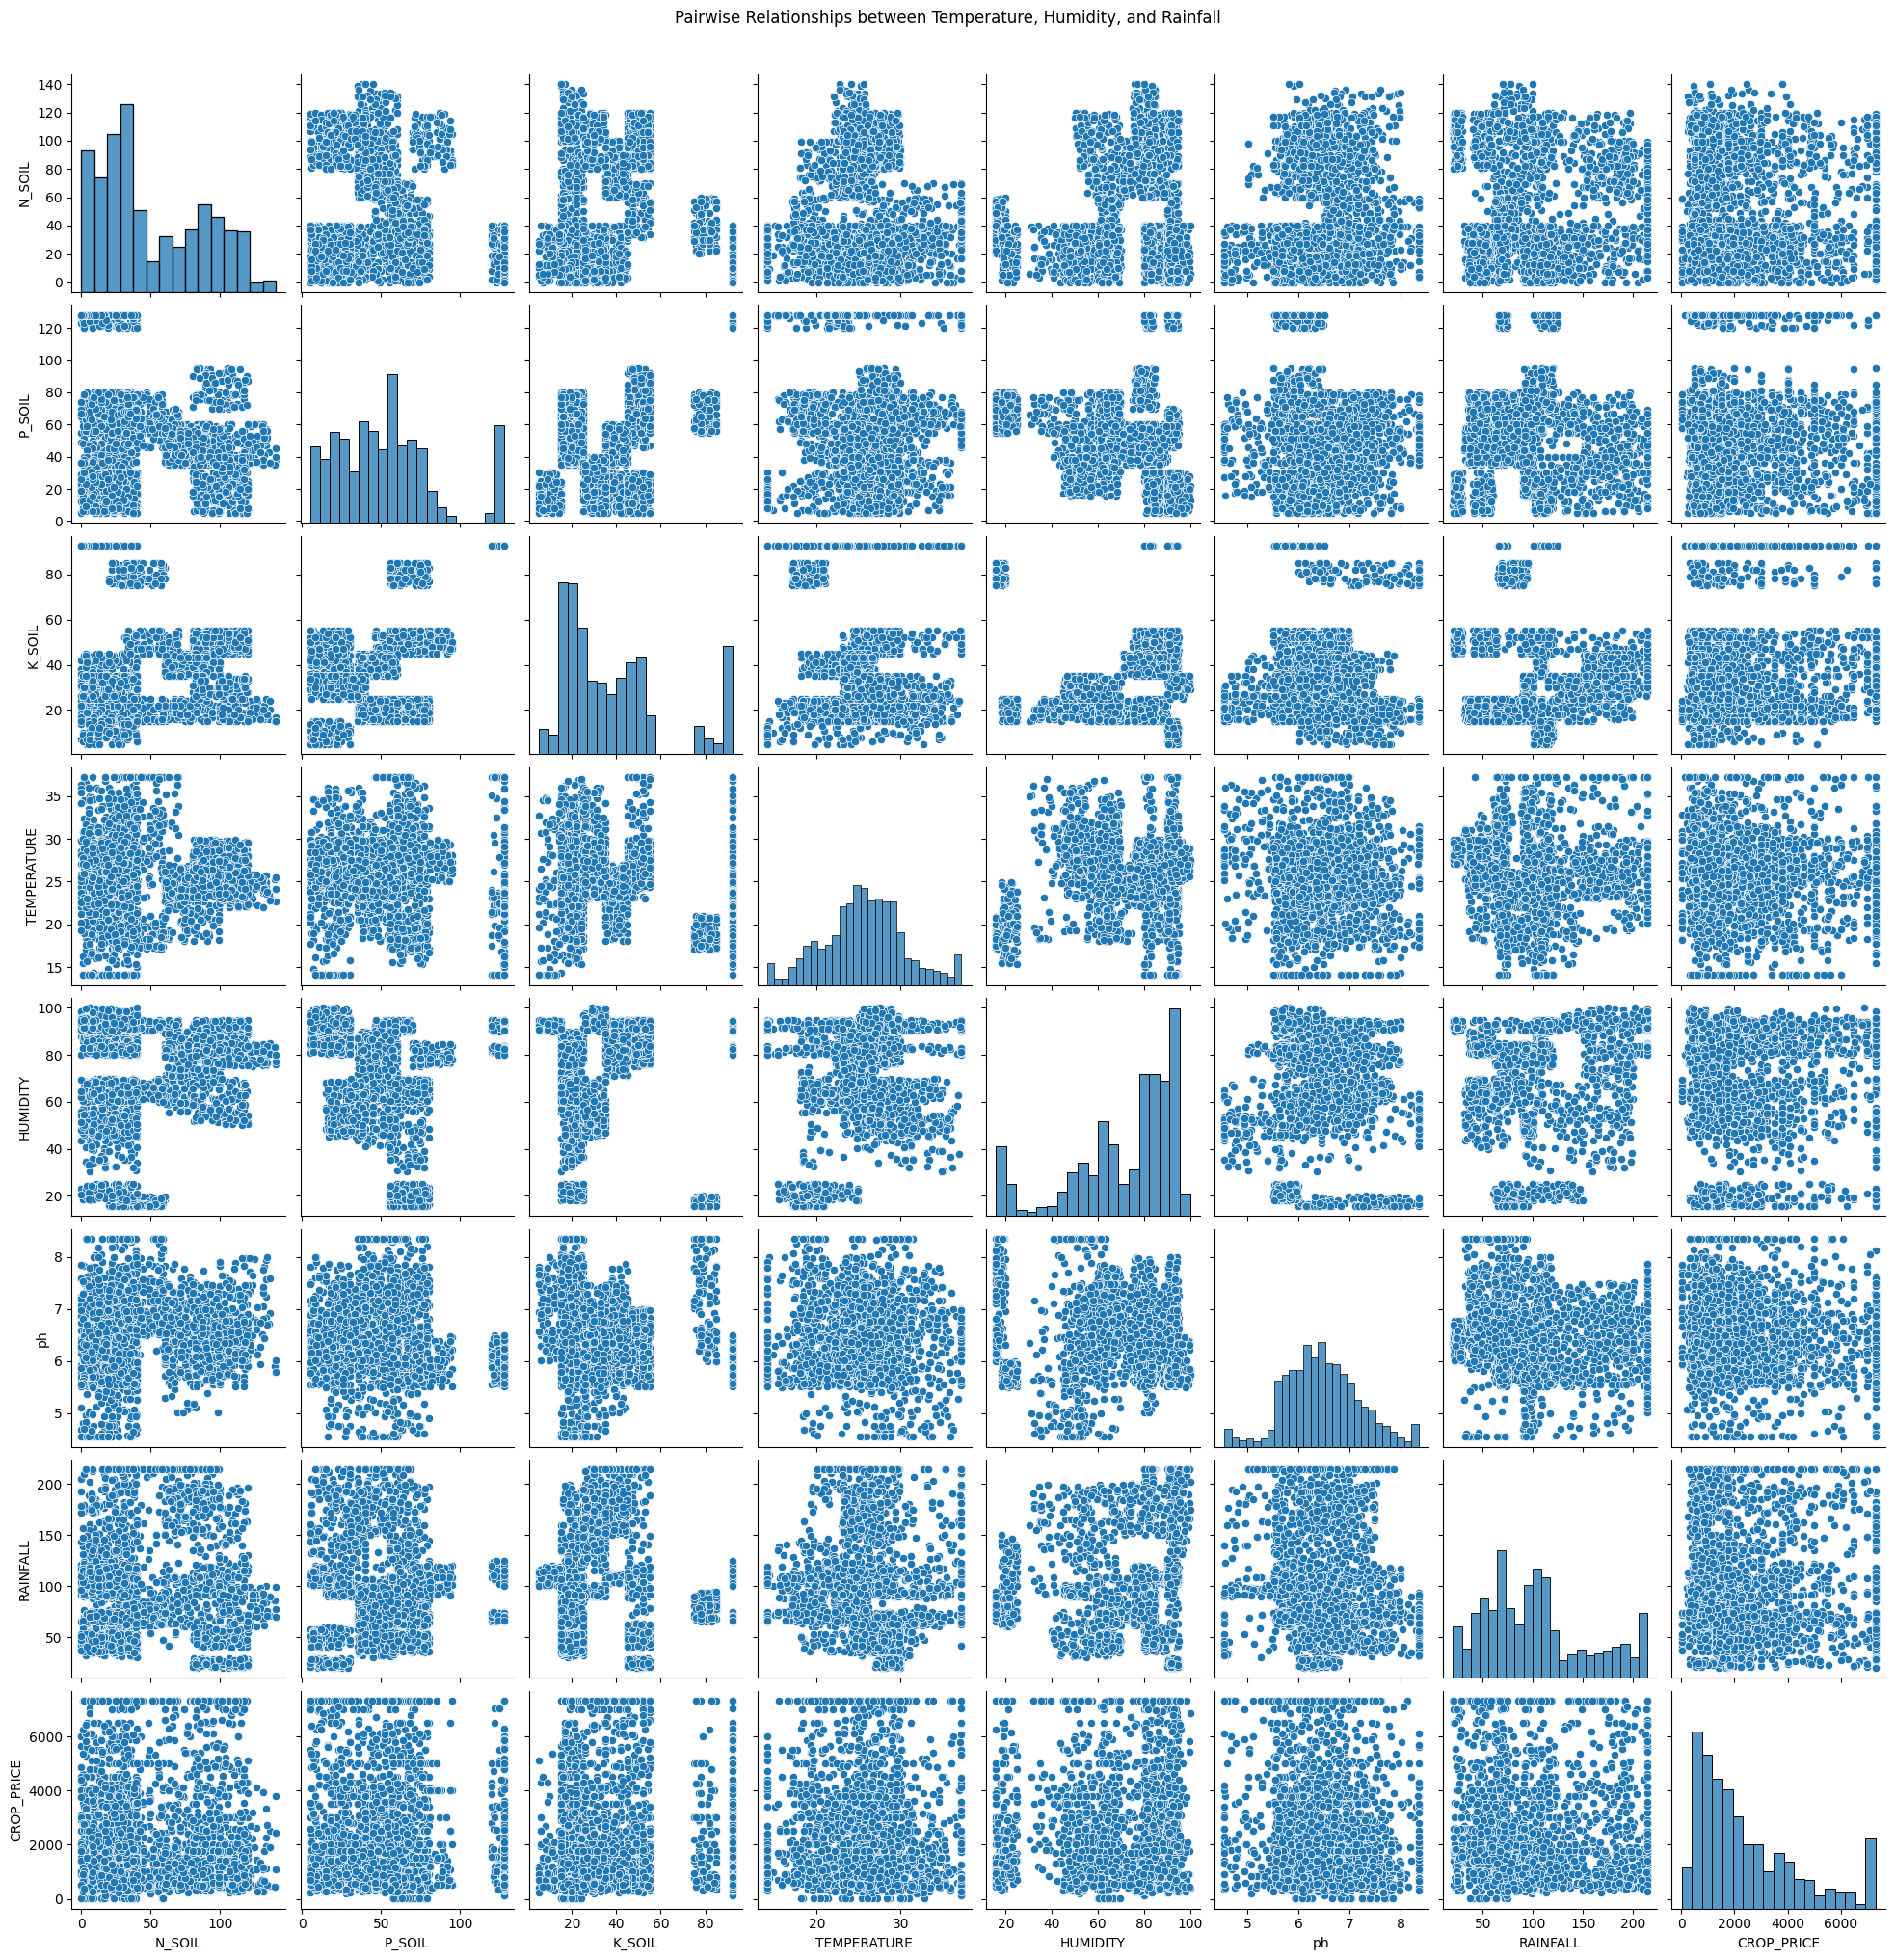

In [12]:
# Visualizing pairwise relationships using scatter plot matrix
import seaborn as sns
sns.pairplot(df)
plt.suptitle('Pairwise Relationships between Temperature, Humidity, and Rainfall', y=1.02)
plt.show()

<ipython-input-13-4484acdb289b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


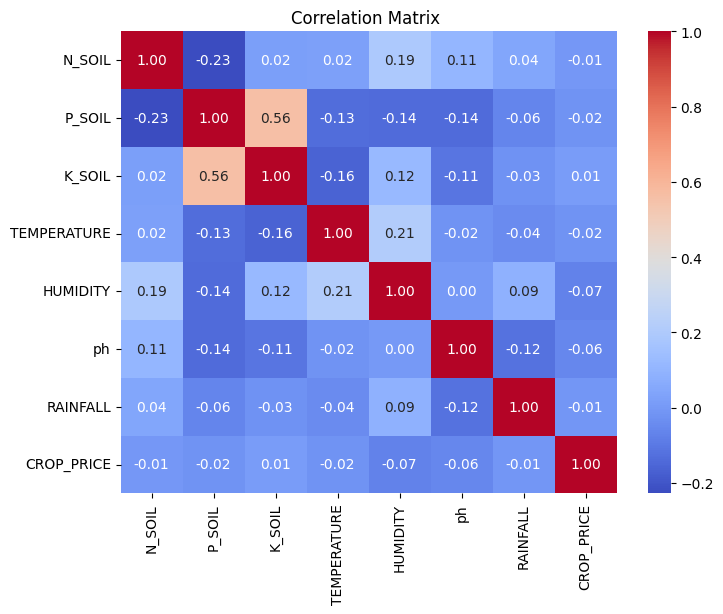

Correlation Matrix:
               N_SOIL    P_SOIL    K_SOIL  TEMPERATURE  HUMIDITY        ph  \
N_SOIL       1.000000 -0.227834  0.019000     0.023850  0.190746  0.106321   
P_SOIL      -0.227834  1.000000  0.561850    -0.132569 -0.138850 -0.140243   
K_SOIL       0.019000  0.561850  1.000000    -0.164312  0.120765 -0.107937   
TEMPERATURE  0.023850 -0.132569 -0.164312     1.000000  0.212362 -0.020906   
HUMIDITY     0.190746 -0.138850  0.120765     0.212362  1.000000  0.000323   
ph           0.106321 -0.140243 -0.107937    -0.020906  0.000323  1.000000   
RAINFALL     0.044041 -0.063986 -0.026358    -0.041047  0.085163 -0.119116   
CROP_PRICE  -0.005032 -0.021370  0.008500    -0.017688 -0.073569 -0.056628   

             RAINFALL  CROP_PRICE  
N_SOIL       0.044041   -0.005032  
P_SOIL      -0.063986   -0.021370  
K_SOIL      -0.026358    0.008500  
TEMPERATURE -0.041047   -0.017688  
HUMIDITY     0.085163   -0.073569  
ph          -0.119116   -0.056628  
RAINFALL     1.000000   -

In [13]:
correlation_matrix = df.corr()

# Visualizing correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix ')
plt.show()

# Displaying the correlation matrix dataframe
print("Correlation Matrix:")
print(correlation_matrix)

there is a slight positive correlation between temperature and humidity(0.21), there is no significant linear relationship between temperature, humidity, and rainfall based on the correlation coefficients calculated.

This indicates that as temperature increases, humidity tends to slightly increase as well.

EDA3: Are there any significant differences in soil nutrients (N_SOIL, P_SOIL, K_SOIL) between different crops?

<ipython-input-14-14acd3370cc1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = df.groupby('CROP').mean()


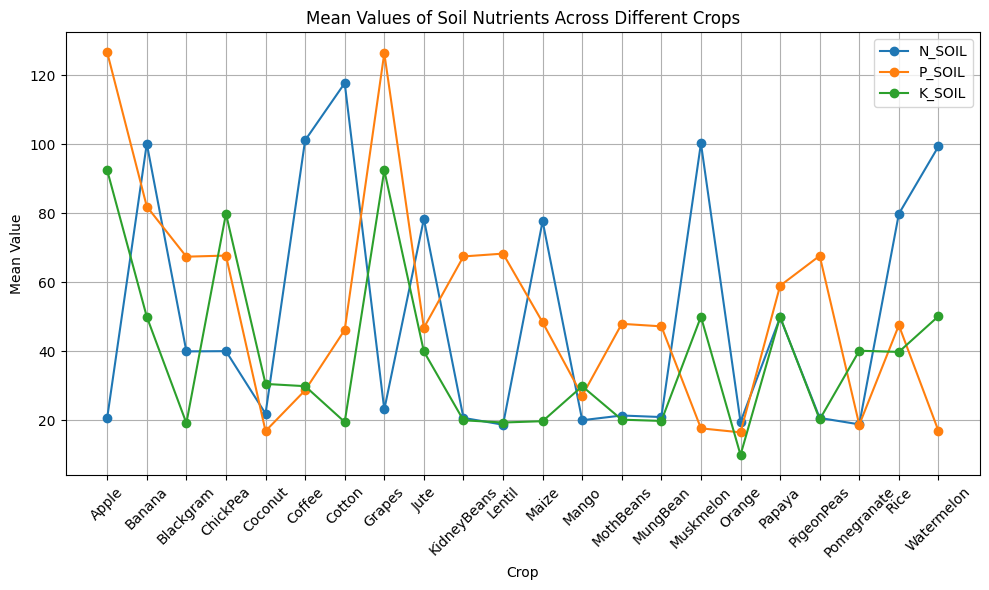

Mean Values of Soil Nutrients Across Different Crops:
             N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph  \
CROP                                                                    
Apple         20.80  126.66   92.50    22.630942  92.333383  5.929663   
Banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
Blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
ChickPea      40.09   67.79   79.92    18.872847  17.114928  7.295763   
Coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
Coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
Cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
Grapes        23.18  126.46   92.50    24.084137  81.875228  6.025937   
Jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
KidneyBeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
Lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932 

In [14]:
# Calculate mean values of soil nutrients for each crop
mean_values = df.groupby('CROP').mean()

# Plotting line plots for mean values of soil nutrients
plt.figure(figsize=(10, 6))

# Plot for N_SOIL
plt.plot(mean_values.index, mean_values['N_SOIL'], marker='o', label='N_SOIL')

# Plot for P_SOIL
plt.plot(mean_values.index, mean_values['P_SOIL'], marker='o', label='P_SOIL')

# Plot for K_SOIL
plt.plot(mean_values.index, mean_values['K_SOIL'], marker='o', label='K_SOIL')

plt.title('Mean Values of Soil Nutrients Across Different Crops')
plt.xlabel('Crop')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the dataframe of mean values
print("Mean Values of Soil Nutrients Across Different Crops:")
print(mean_values)


1. **Nitrogen (N_SOIL):**  
   - Nitrogen levels vary widely across crops, ranging from as low as 18.77 for Lentil to as high as 117.77 for Cotton. This indicates diverse nitrogen requirements among different crops.

2. **Phosphorus (P_SOIL):**  
   - Phosphorus levels also exhibit considerable variation across crops, with values ranging from 16.55 for Orange to 126.66 for Apple. Such disparities highlight the importance of phosphorus management tailored to specific crop needs.

3. **Potassium (K_SOIL):**  
   - Potassium levels display notable differences across crops, with values spanning from 10.01 for Orange to 92.50 for several crops including Apple and Grapes. Understanding these variations is crucial for optimizing potassium fertilization strategies.

Overall, these findings underscore the necessity of crop-specific soil nutrient management practices to ensure optimal growth, yield, and overall crop health. Farmers and agricultural practitioners should consider these variations in soil nutrient levels when formulating fertilization plans and crop management strategies to maximize agricultural productivity and sustainability.

EDA4:Which crops are most commonly grown in each state?

In [15]:
state_crop_counts = df.groupby('STATE')['CROP'].value_counts().reset_index(name='COUNT')

# Get the most commonly grown crop for each state
most_common_crops = state_crop_counts.groupby('STATE').first().reset_index()


# Displaying dataframe
print("Most Commonly Grown Crops in Each State:")
print(most_common_crops)

plt.tight_layout()
plt.show()

Most Commonly Grown Crops in Each State:
                  STATE         CROP  COUNT
0   Andaman and Nicobar         Rice     15
1        Andhra Pradesh         Rice      7
2                 Assam         Rice     58
3           Chattisgarh         Rice      5
4                   Goa         Rice      3
5               Gujarat        Maize    100
6               Haryana     ChickPea     65
7      Himachal Pradesh  KidneyBeans     68
8     Jammu and Kashmir  KidneyBeans      3
9             Karnataka  KidneyBeans     29
10               Kerala    MothBeans    100
11       Madhya Pradesh    Blackgram     25
12          Maharashtra       Lentil     87
13              Manipur  Pomegranate     39
14            Meghalaya  Pomegranate      6
15             Nagaland  Pomegranate      6
16               Odisha  Pomegranate     49
17          Pondicherry       Banana      7
18               Punjab        Mango    100
19            Rajasthan       Grapes     41
20           Tamil Nadu   Watermelo

<Figure size 640x480 with 0 Axes>

Rice dominates the agricultural landscape in states like Assam, Andaman and Nicobar, and Andhra Pradesh.
States like Gujarat, Kerala, Punjab, Tamil Nadu, and Uttar Pradesh show a high prevalence of specific crops such as Maize, MothBeans, Mango, Watermelon, and Apple respectively.
Other states exhibit a variety of dominant crops, including Pomegranate in Manipur, Grapes in Rajasthan, and ChickPea in Haryana.

EDA5:Identify trends in crop prices for each crop

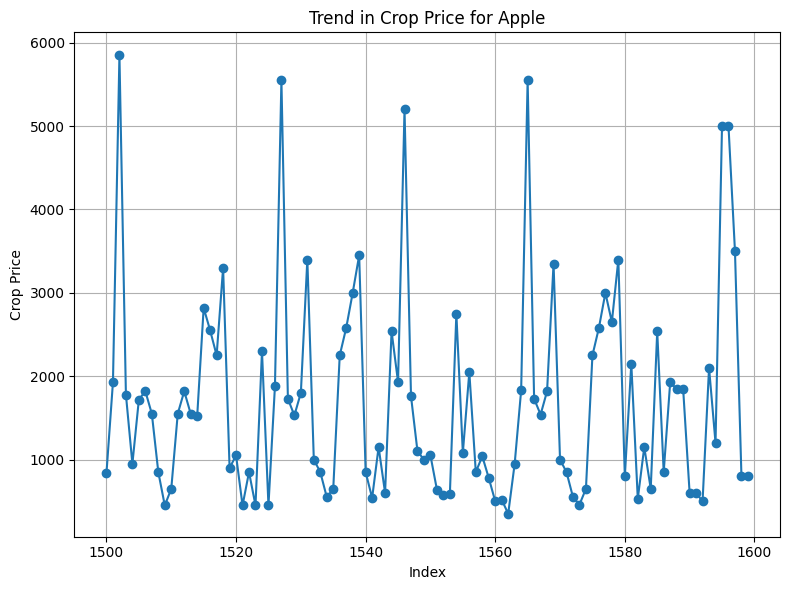

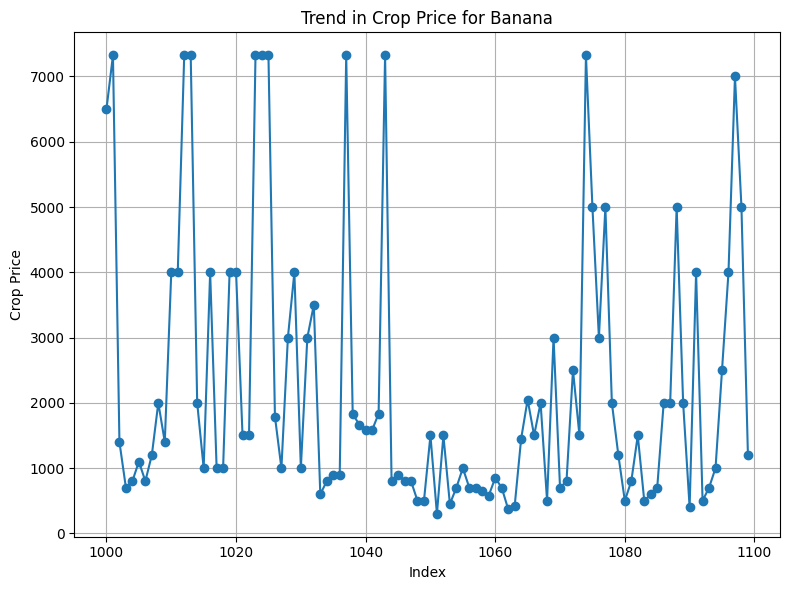

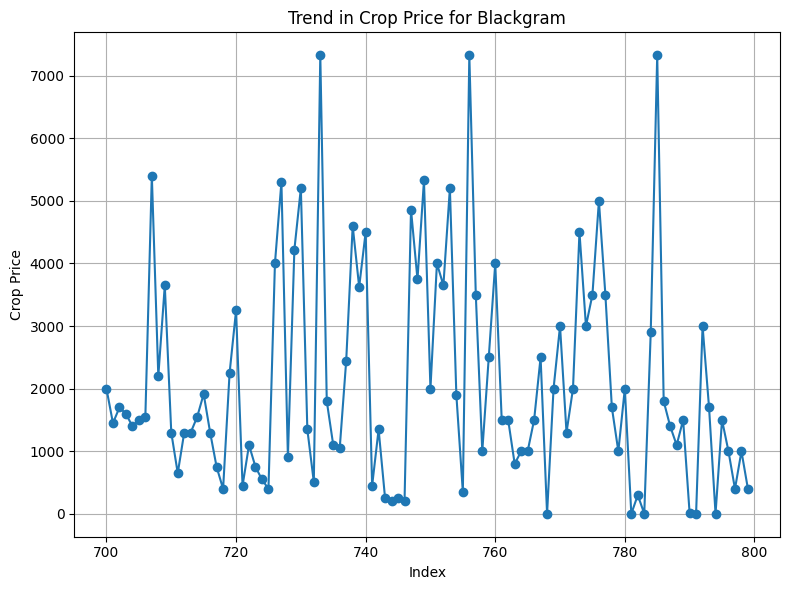

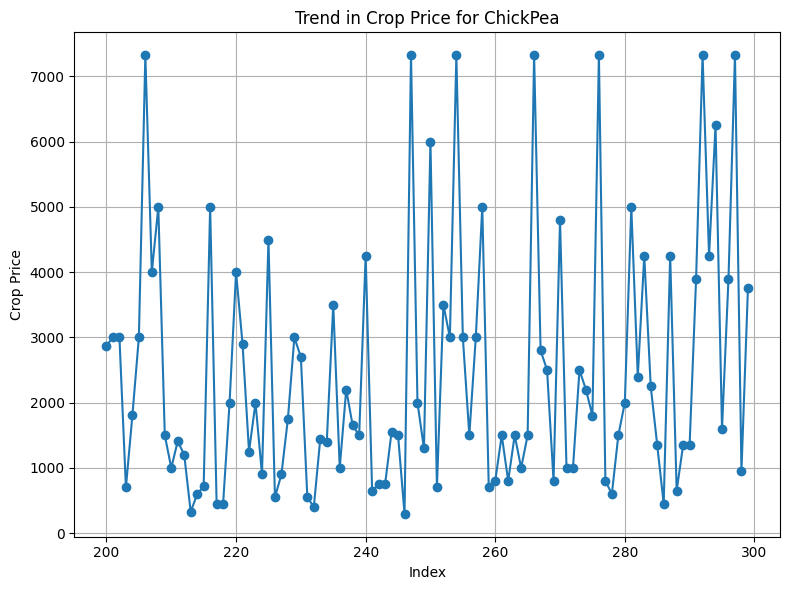

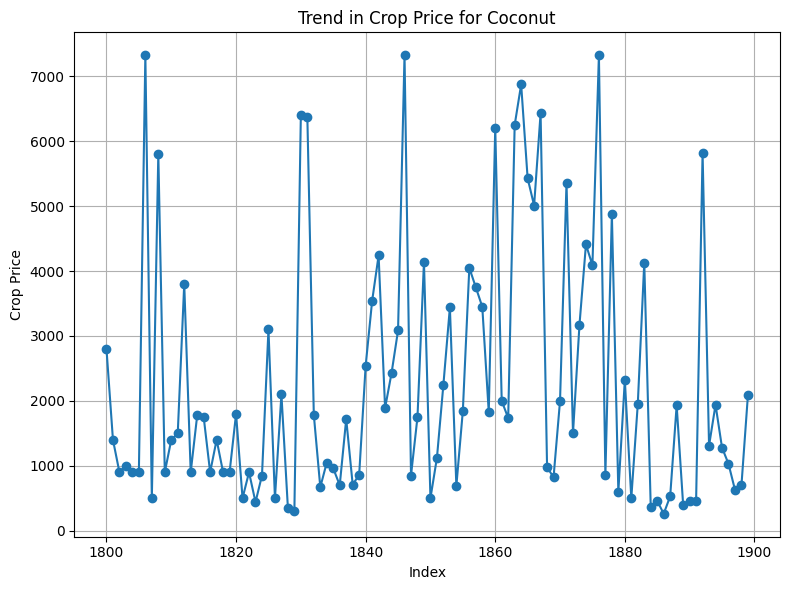

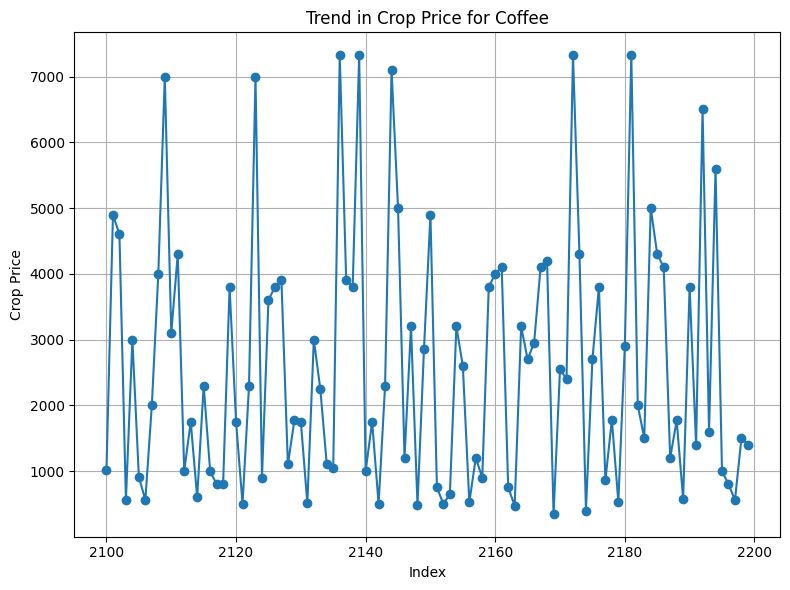

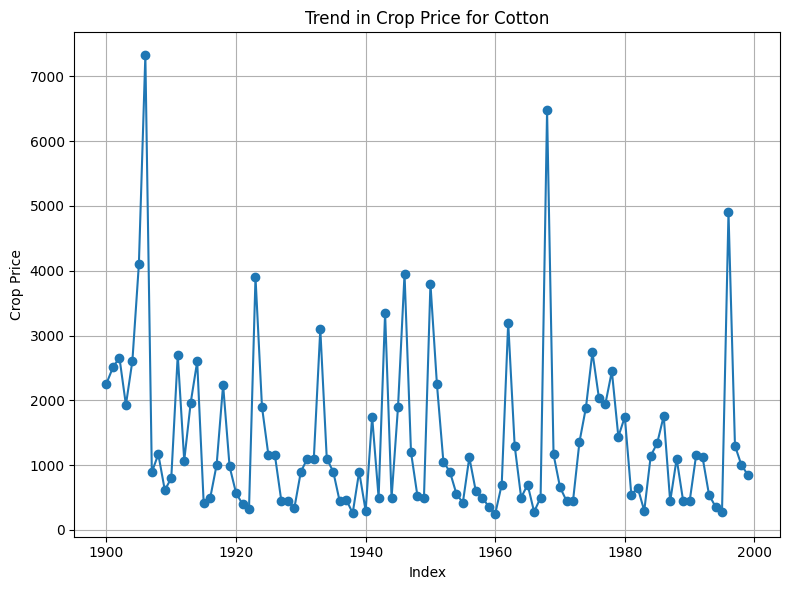

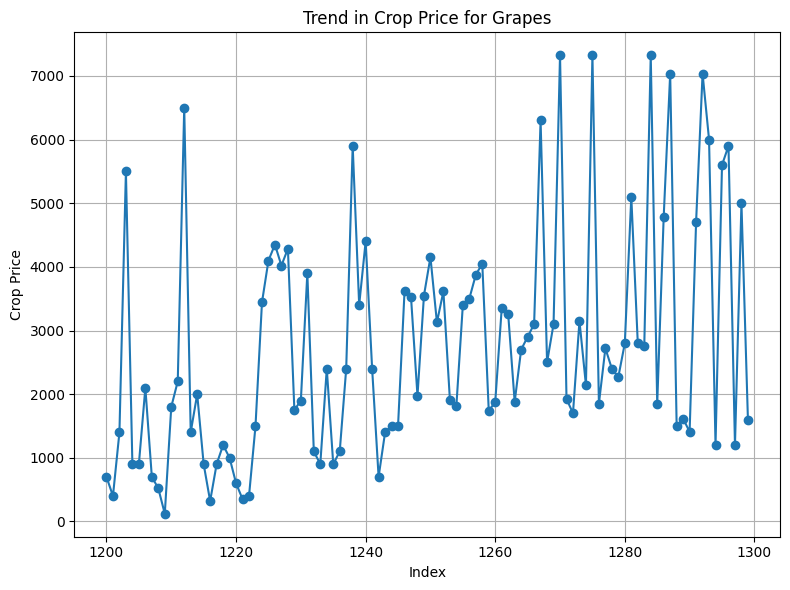

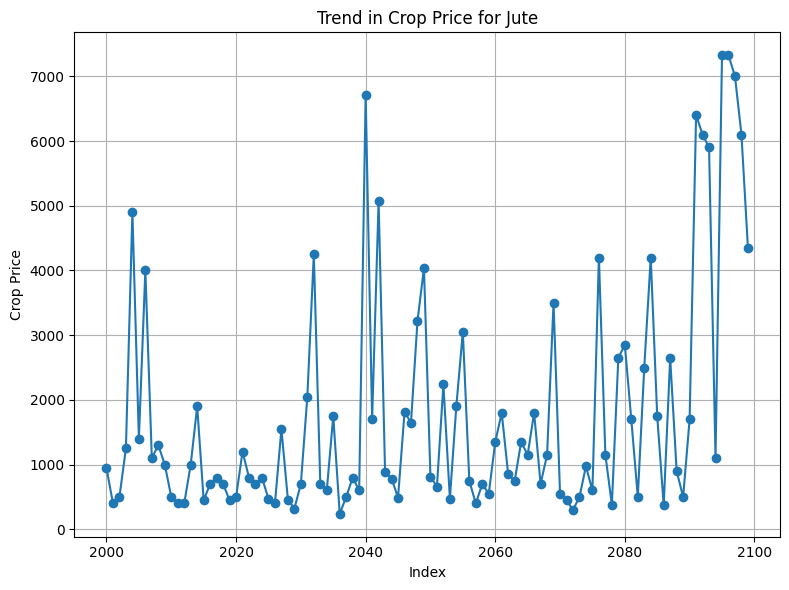

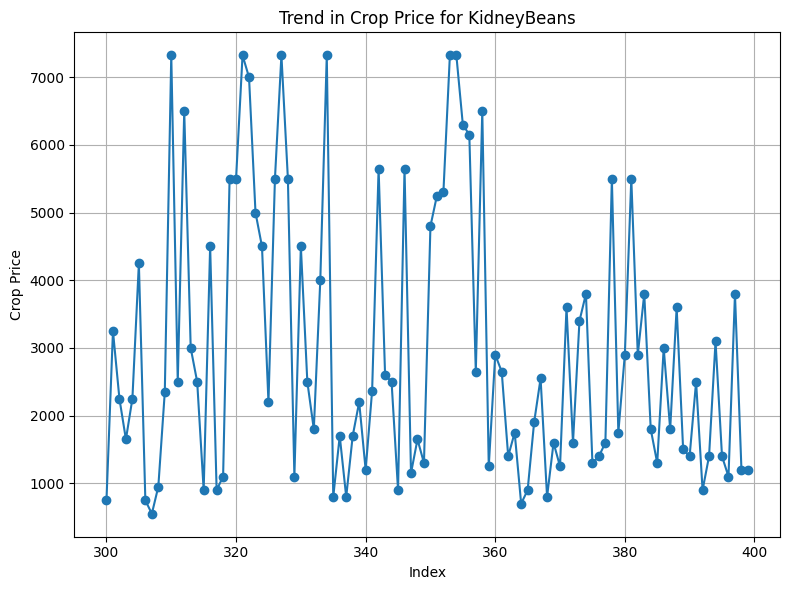

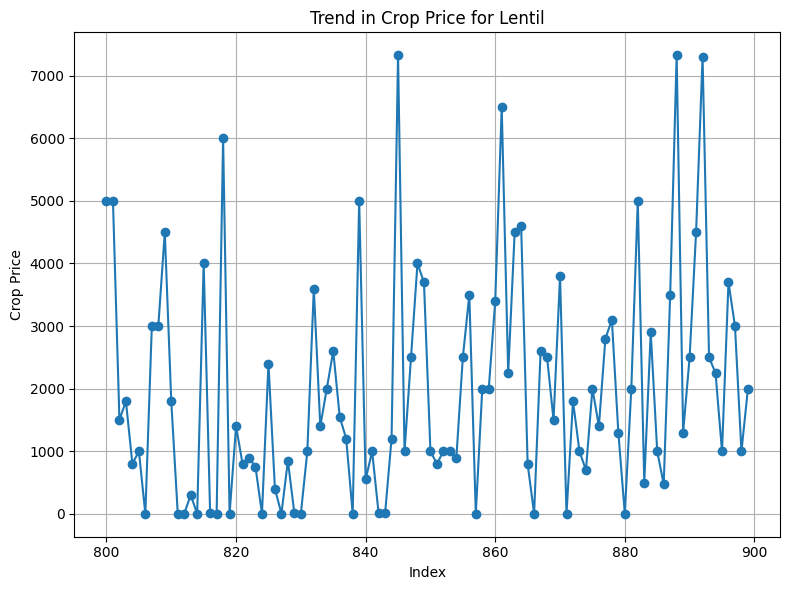

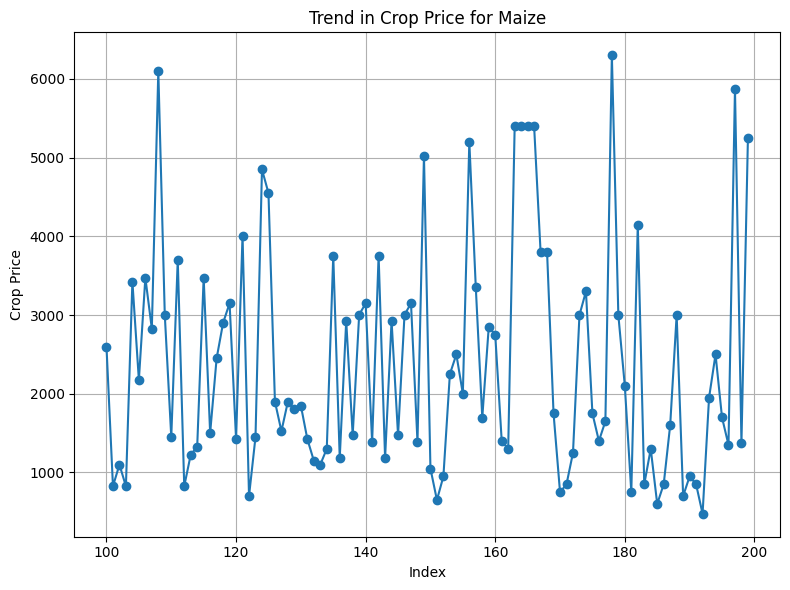

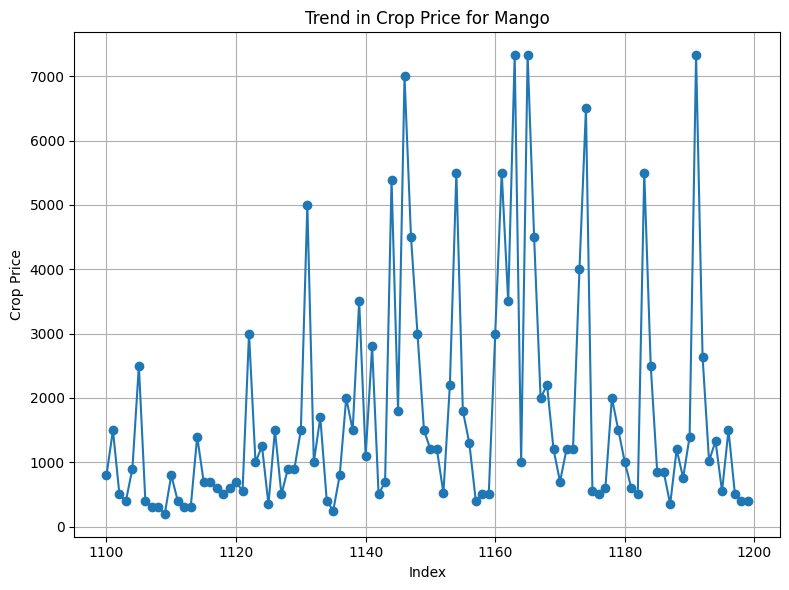

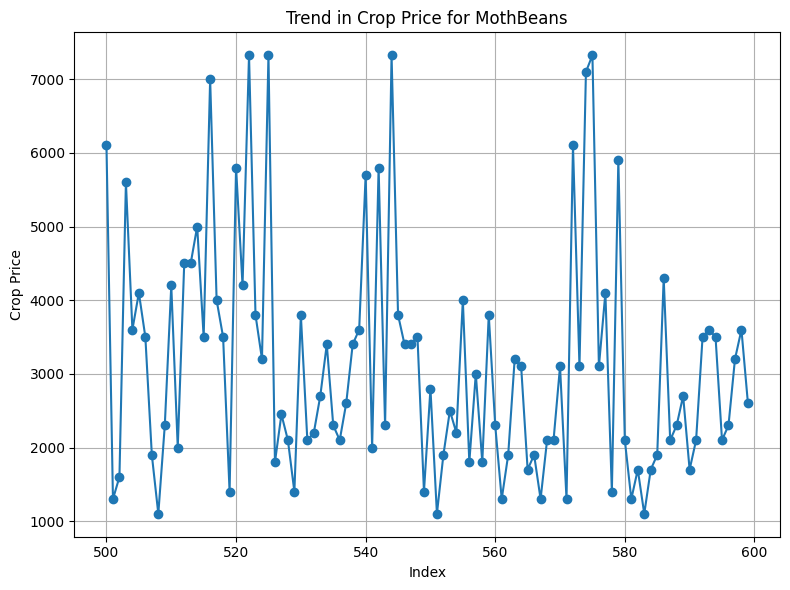

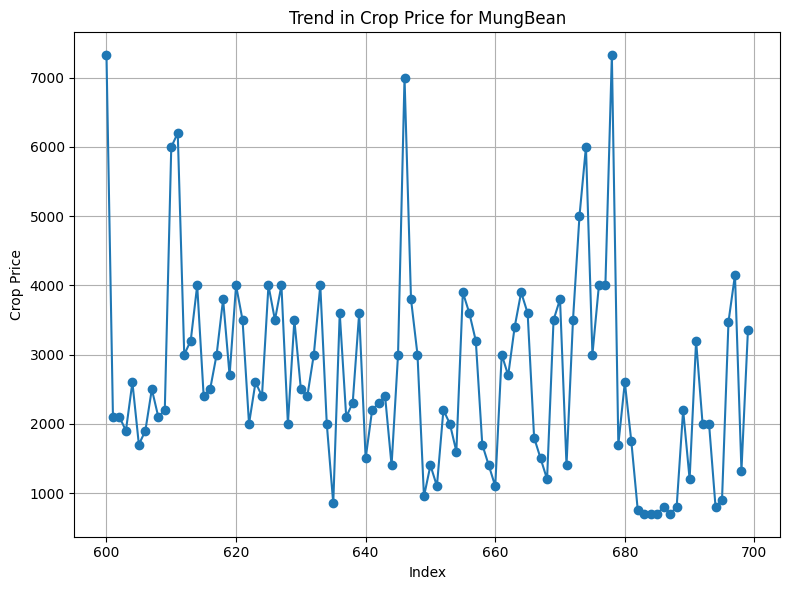

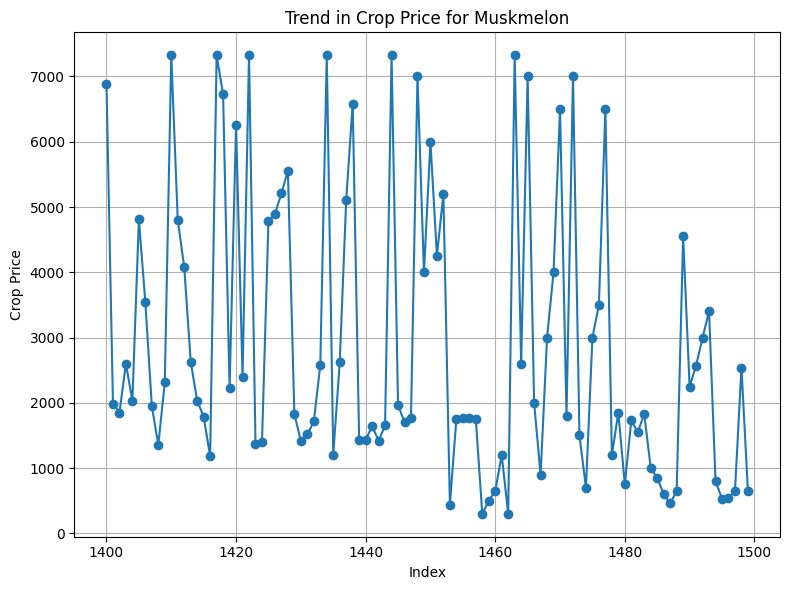

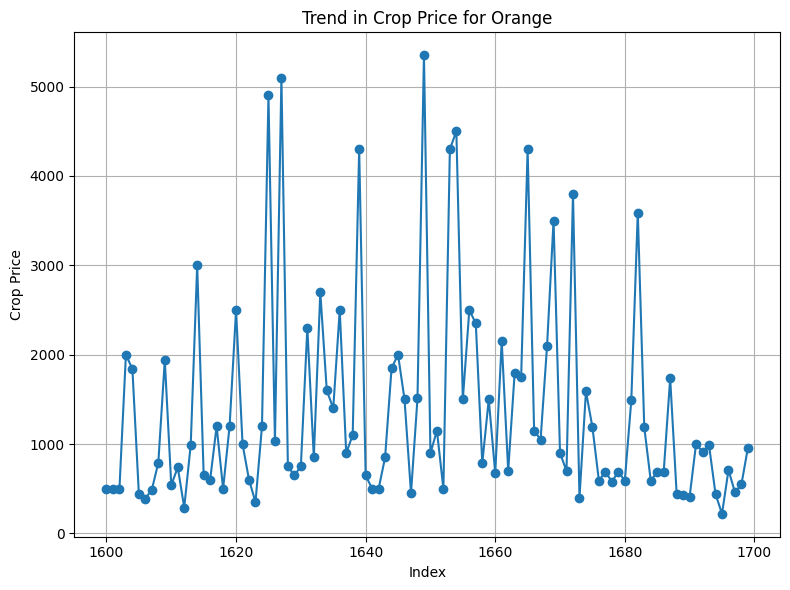

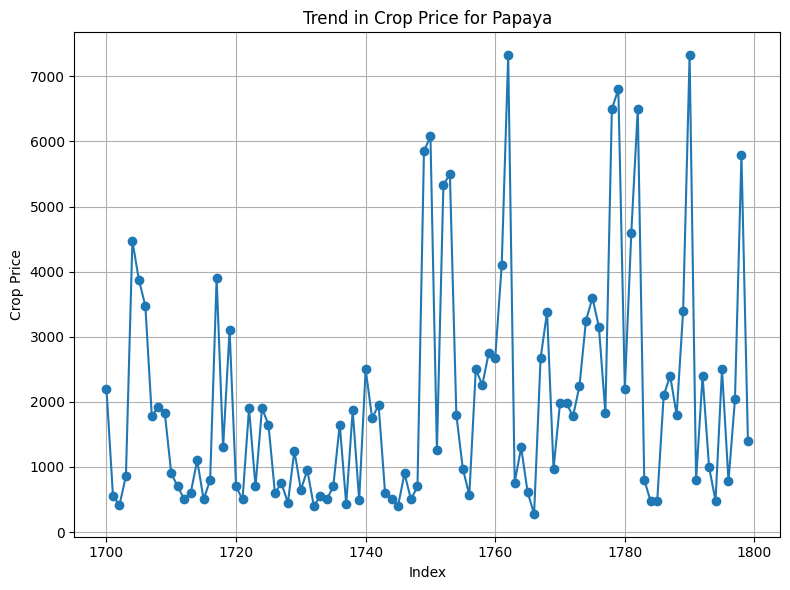

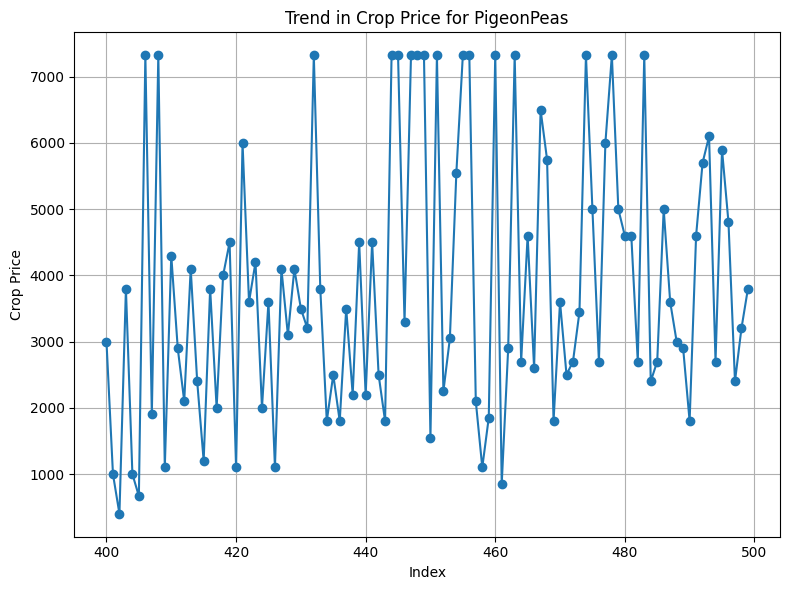

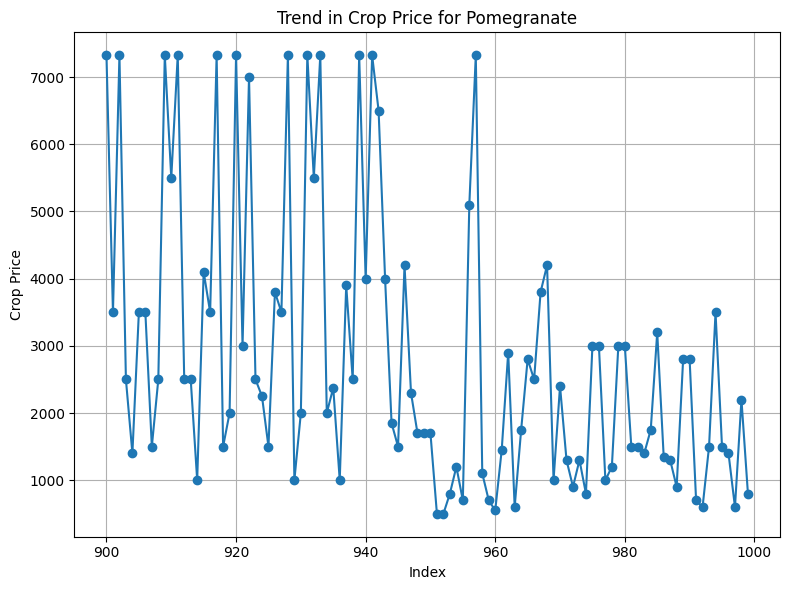

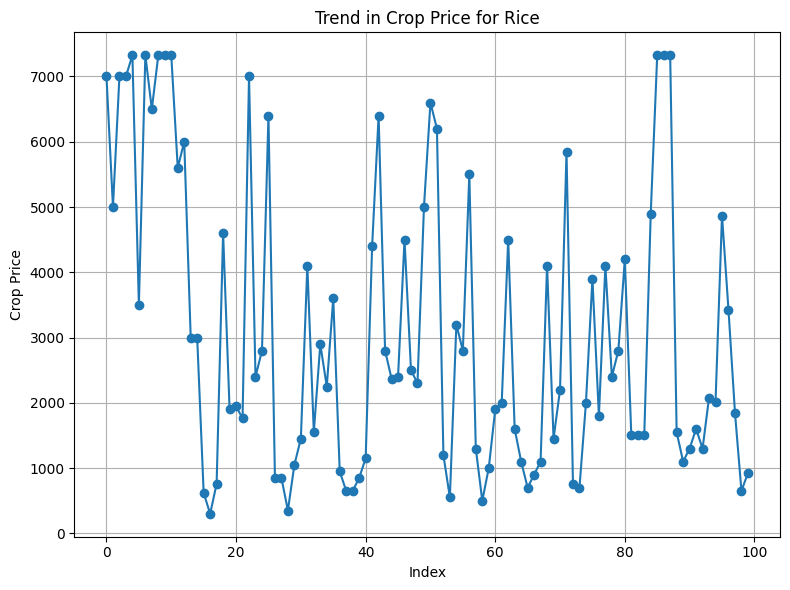

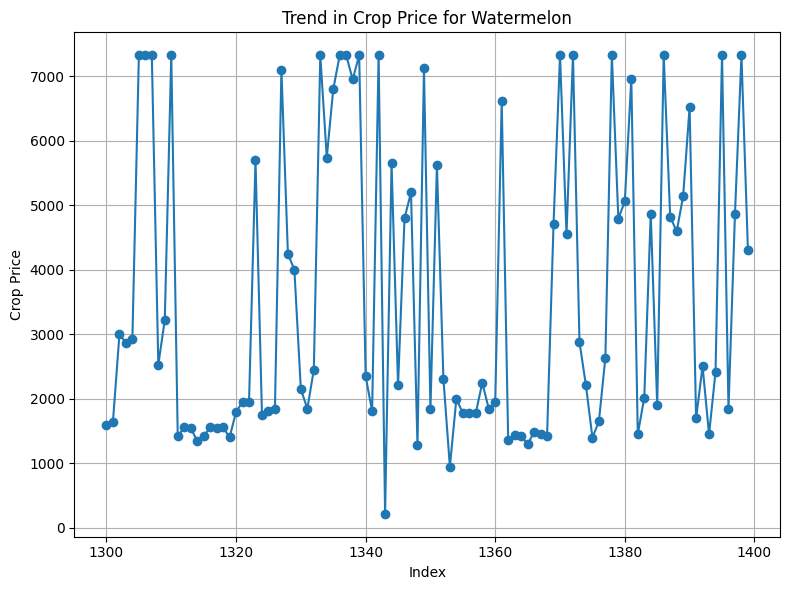

In [16]:
# Group by 'CROP' and plot individual plots for each crop
for crop, group in df.groupby('CROP'):
    plt.figure(figsize=(8, 6))
    plt.plot(group.index, group['CROP_PRICE'], marker='o')
    plt.title(f'Trend in Crop Price for {crop}')
    plt.xlabel('Index')
    plt.ylabel('Crop Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
import seaborn as sns

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18768\3652019946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CROP_PRICE'])


<Axes: xlabel='CROP_PRICE', ylabel='Density'>

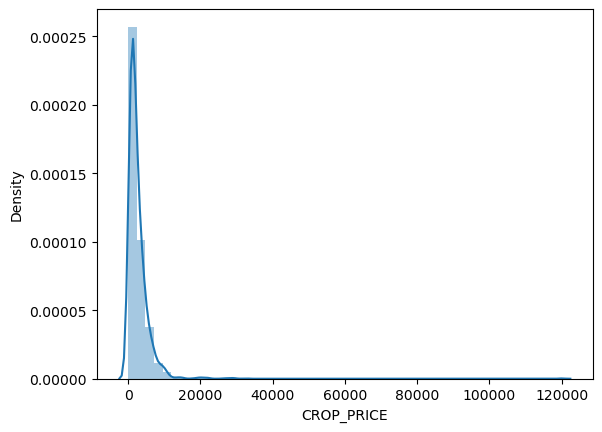

In [4]:
sns.distplot(df['CROP_PRICE'])

In this plot we could that the distribution of crop price is left skewed.

C:\Users\Shubham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


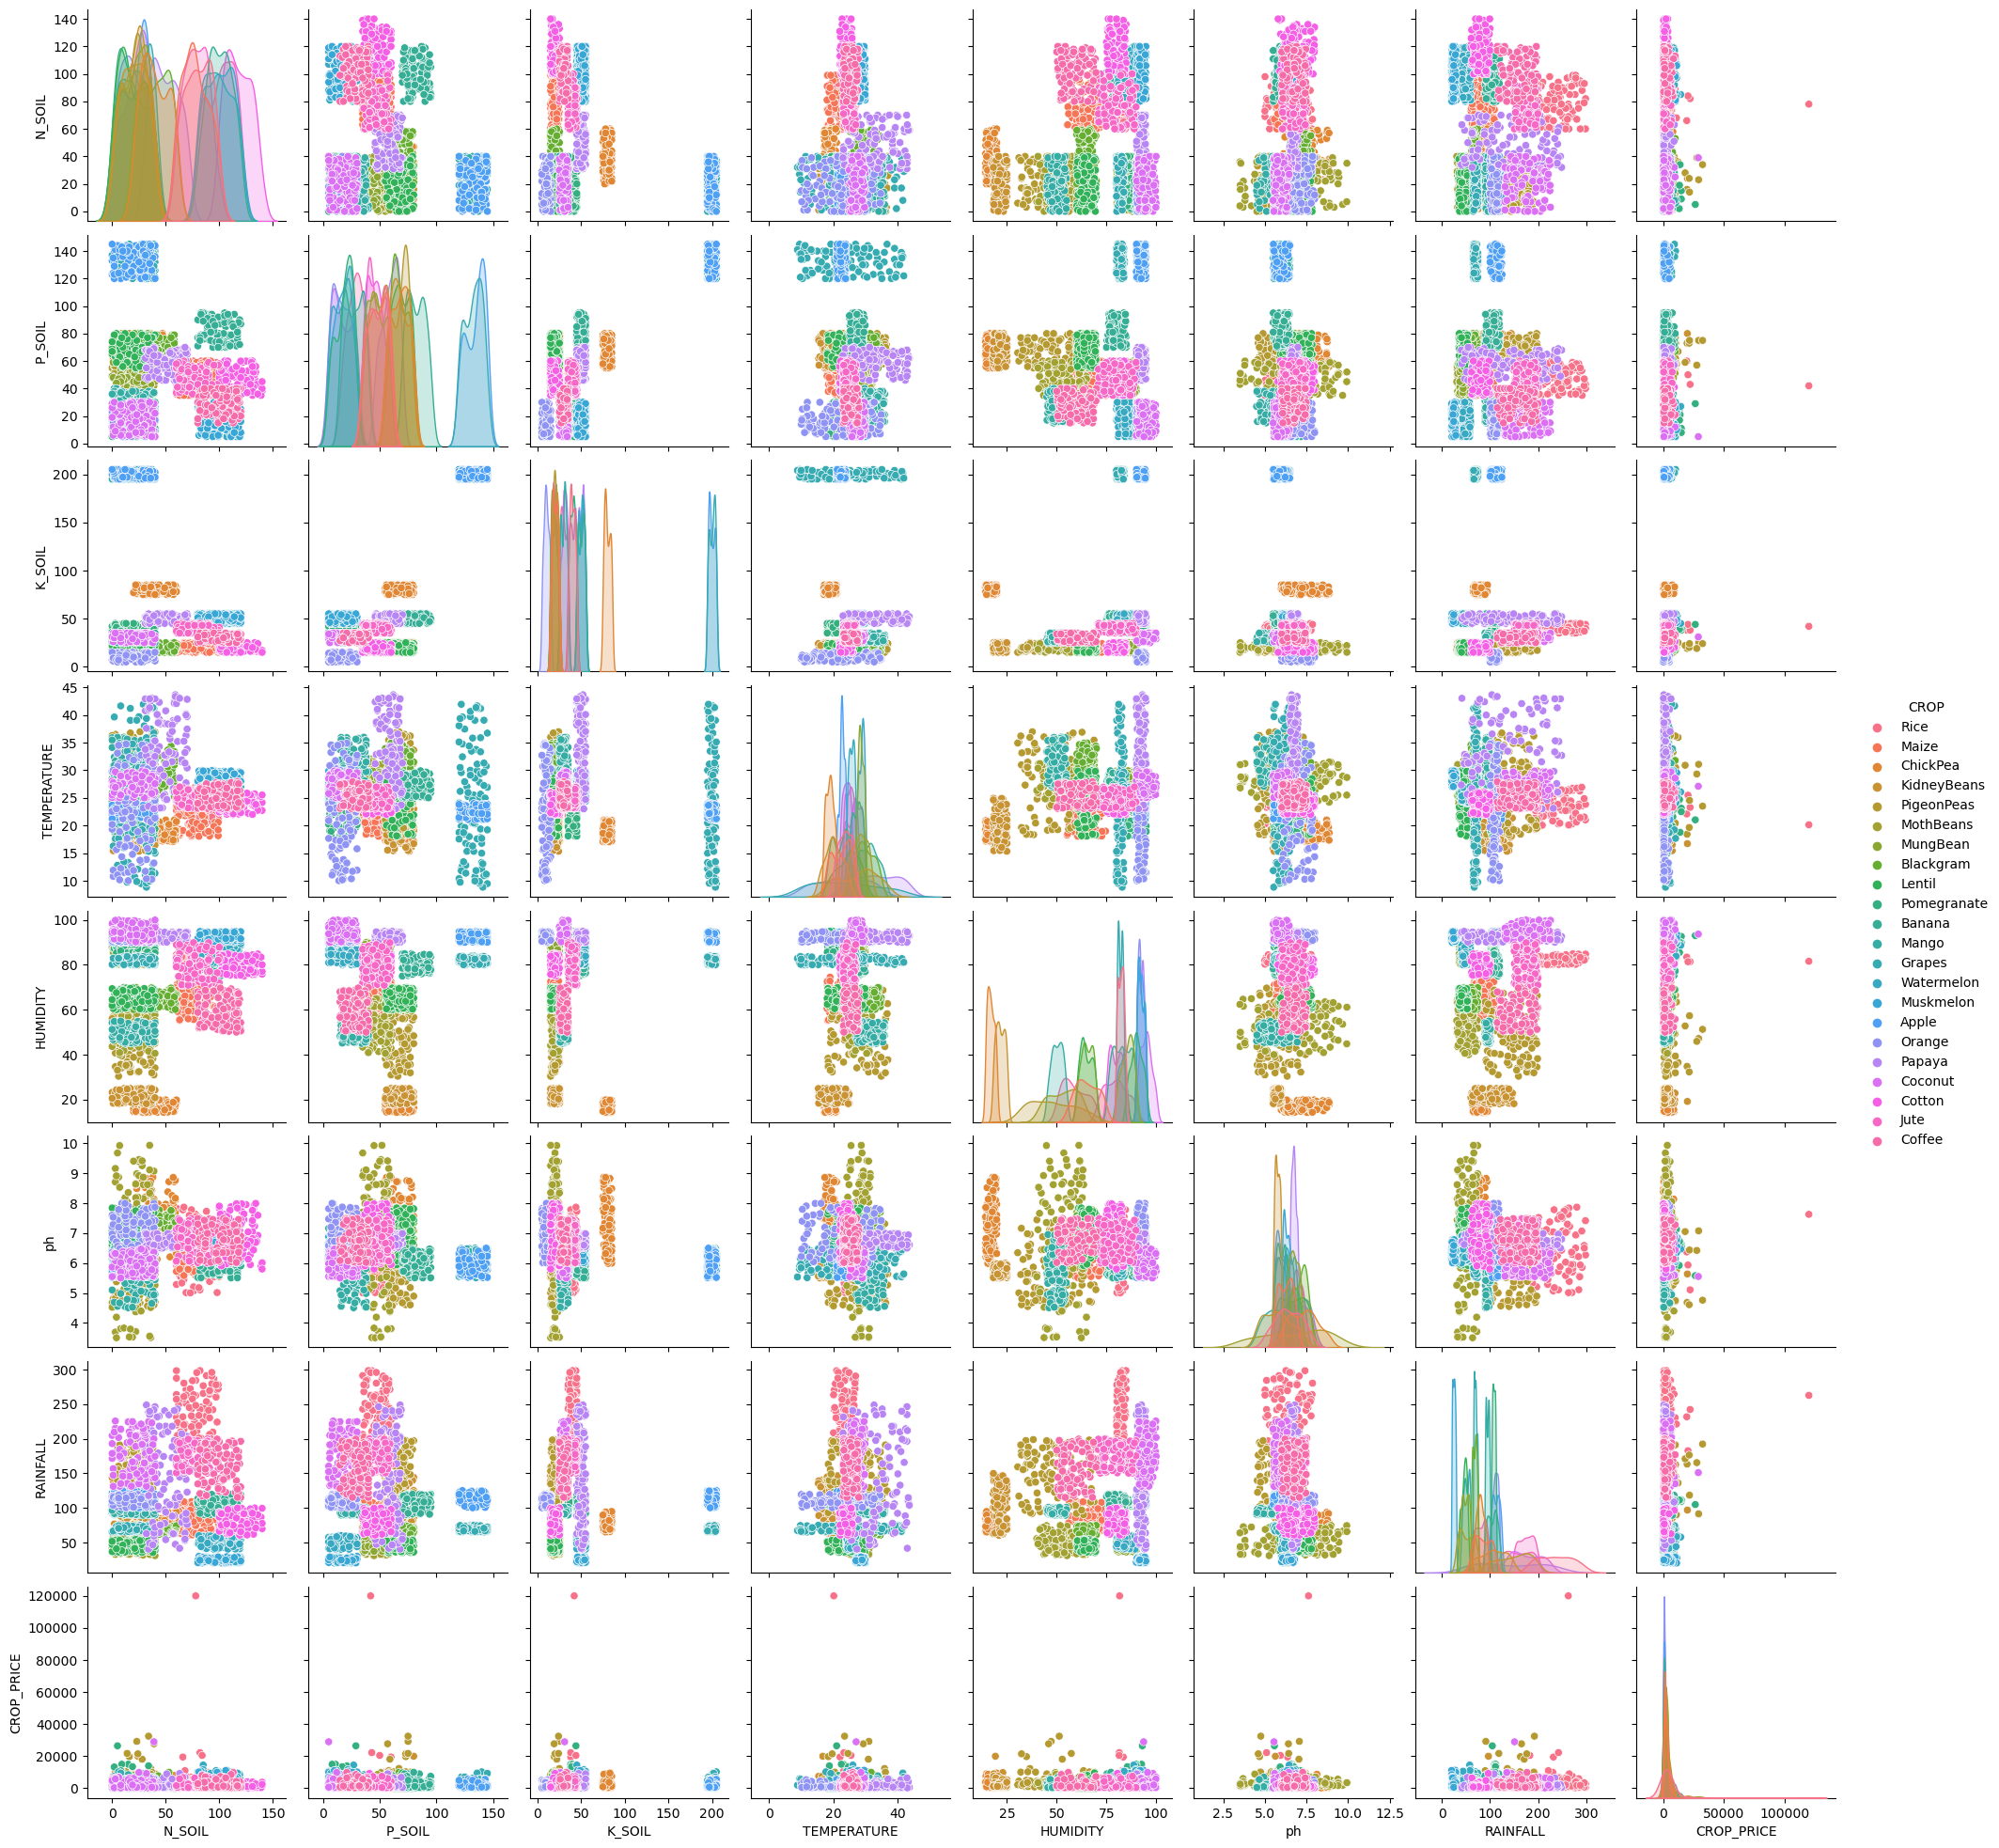

In [5]:
sns.pairplot(df, hue = 'CROP')

<Axes: xlabel='STATE'>

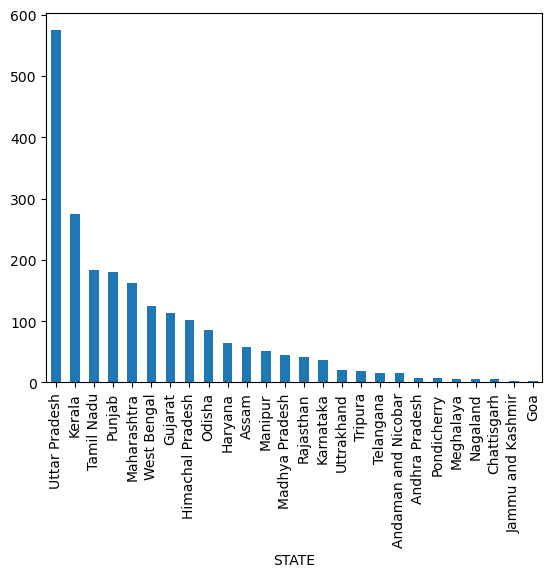

In [6]:
df['STATE'].value_counts().plot(kind='bar')

In this we can see state wise plot

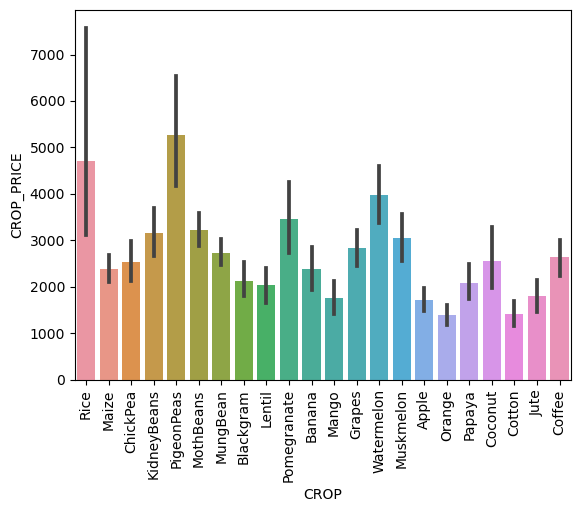

In [7]:
import matplotlib.pyplot as plt
sns.barplot(x=df['CROP'],y=df['CROP_PRICE'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
In this plot we could observe that PigeonPeas and rice have the highest crop price.

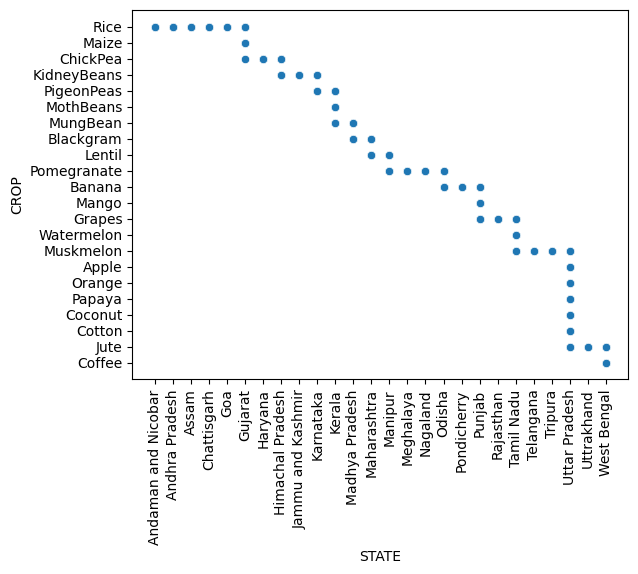

In [9]:
sns.scatterplot(x=df['STATE'],y=df['CROP'])
plt.xticks(rotation='vertical')
plt.show()